In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
result_csv = 'build/data.txt'

df = pd.read_csv(result_csv)
display(df)

,n,total time,cuda time,cuda mem cpy,cuda mem cpy back
0,1,0.133065,0.000000,3.087340e-41,3.087340e-41
1,21,0.008172,0.443008,3.087340e-41,3.087340e-41
2,41,0.002833,0.512768,3.087340e-41,3.087340e-41
3,61,0.011579,0.513568,3.087340e-41,3.087340e-41
4,81,0.011599,0.517760,3.087340e-41,3.087340e-41
...,...,...,...,...,...
98,1961,0.027653,1.251620,3.087340e-41,3.087340e-41
99,1981,0.038150,1.233380,3.087340e-41,3.087340e-41
100,2001,0.027796,1.368610,3.087340e-41,3.087340e-41
101,2021,0.030945,1.214110,3.087340e-41,3.087340e-41


In [27]:
print(df.columns)
total_time = df['total time'].to_numpy() * 1000
cuda_time = df['cuda time'].to_numpy()
cpy_time = df['cuda mem cpy'].to_numpy()
cpy_back_time = df['cuda mem cpy back'].to_numpy()

x = df['n'].to_numpy()
print(total_time.shape)
print(cuda_time.shape)


Index(['n', 'total time', 'cuda time', 'cuda mem cpy', 'cuda mem cpy back'], dtype='object')
(103,)
(103,)


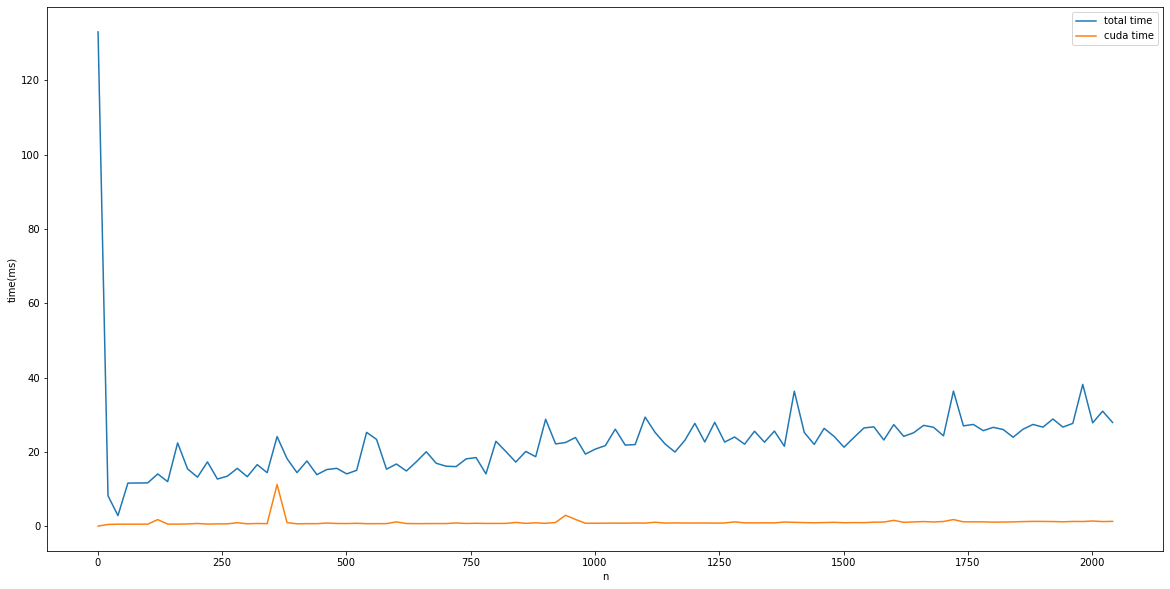

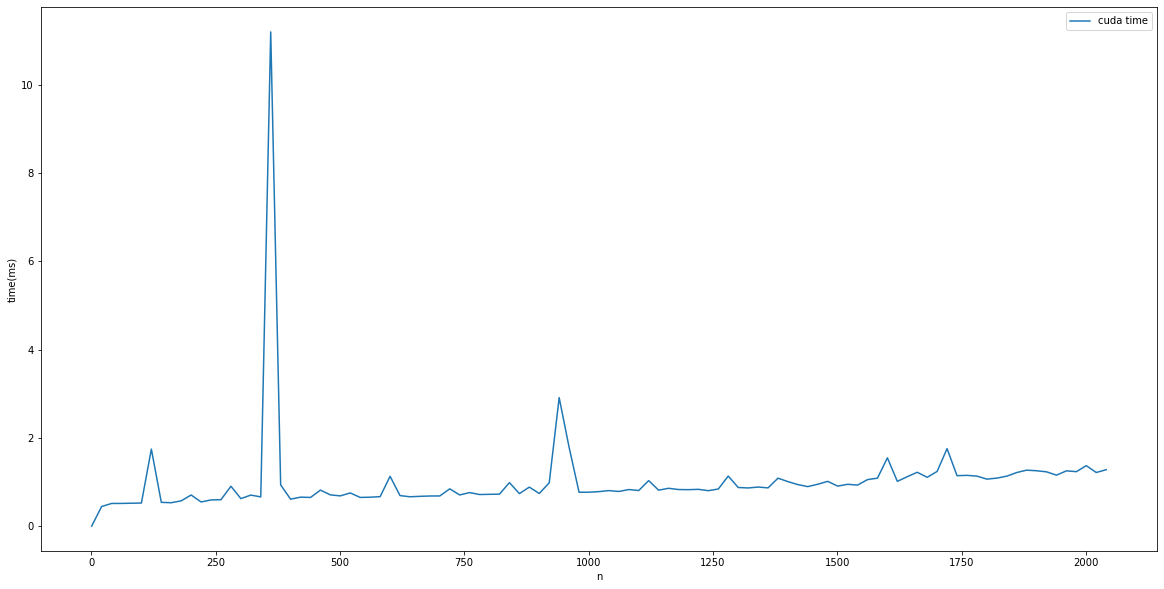

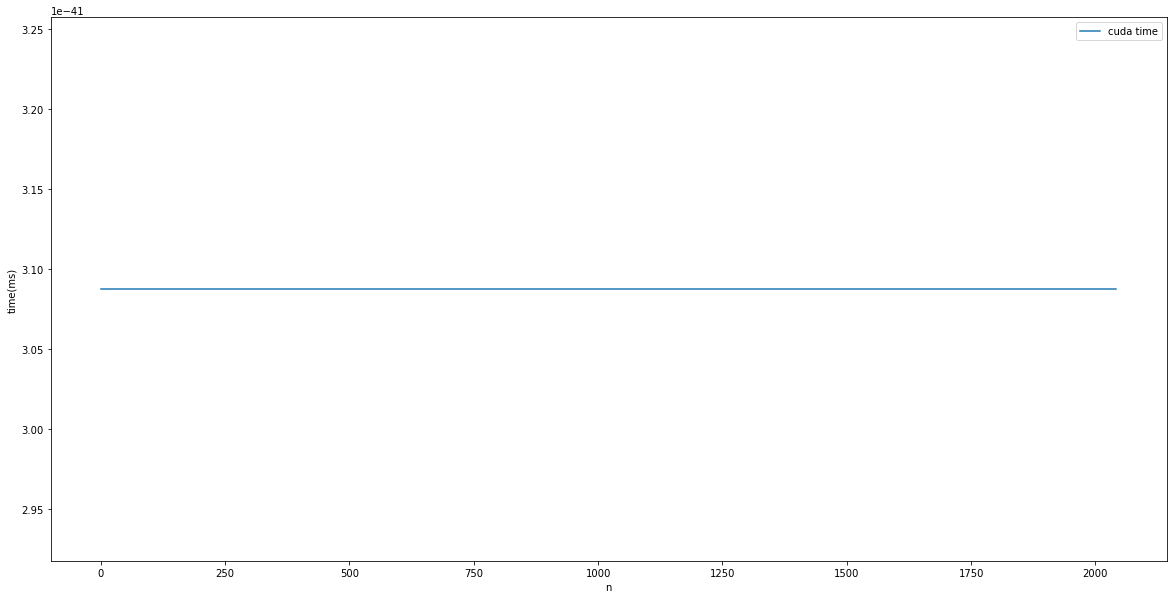

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(x, total_time, label='total time')
plt.plot(x, cuda_time, label='cuda time')
plt.xlabel('n')
plt.ylabel('time(ms)')
plt.legend()
plt.savefig("total_timeplot.png")
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(x, cuda_time, label='cuda time')
plt.xlabel('n')
plt.ylabel('time(ms)')
plt.legend()
plt.savefig("cuda_timeplot.png")
plt.show()


plt.figure(figsize=(20, 10))
plt.plot(x, cpy_back_time, label='cuda time')
plt.xlabel('n')
plt.ylabel('time(ms)')
plt.legend()
plt.savefig("cuda_timeplot.png")
plt.show()

In [51]:
# make videos
import os
from os.path import join
from tqdm import tqdm

def get_files(folder):
    return [join(folder, f) for f in os.listdir(folder) if os.path.isfile(join(folder,f))]

folder = 'build/video_out'
files = get_files(folder)
prefix_set = set()
for f in tqdm(files):
    prefix = f[:f.find('.png')-5]
    prefix_set.add(prefix)

os.makedirs("video_out", exist_ok=True)

for prefix in tqdm(prefix_set):
    base_prefix = os.path.basename(prefix)
    outname =  join("video_out", base_prefix + '.mp4')
    cmd = 'ffmpeg -r 12 -f image2 -s 1920x1080 -i {}_%04d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p {}'.format(prefix, outname)
    os.system(cmd)

100%|██████████| 73/73 [09:10<00:00,  7.55s/it]
